# **5.3 커널 PCA를 사용하여 비선형 매핑**

많은 머신러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다고 가정한다.<br>
하지만 **실전** 애플리케이션에서는 **비선형 문제**를 더 자주 보게 될 것이다.

<br>

**비선형 문제를 다룰 때** PCA나 LDA 같은 선형 변환 기법을 사용하기보다 **PCA의 커널화 버전(KPCA)**을 사용하는 것이 더 좋다.<br>
**커널 PCA**는 선형적으로 구분되지 않는 데이터를 **선형** 분류기에 적합한 새로운 저차원 부분 공간으로 변환**한다.

<br>

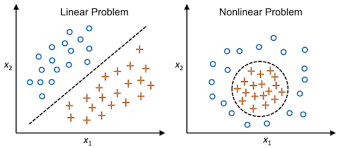

<br>
커널 PCA는 커널 SVM 개념과 관계가 있다. 

--- 

<br>


## **5.3.1 커널 함수와 커널 트릭**

커널 SVM에서 **'비선형 문제를 해결하기 위해 클래스가 선형으로 구분되는 새로운 고차원 특성 공간으로 투영할 수 있다'**는 내용을 배웠다.

<br>

                                                                k 고차원 부분 공간에 있는 샘플
$$x \in \mathbb{R}^d$$

                                                               를 변환하기 위해 비선형 매핑 함수 φ(phi)를 정의한다.


$$\phi : \mathbb{R}^d \rightarrow \mathbb{R}^k (k >> d)$$


<br>

**φ(phi) 함수**를 d차원의 원본 데이터셋에서 더 큰 k차원의 특성 공간으로 매핑하기 위해 **원본 특성의 비선형 조합을 만드는 함수**로 생각할 수 있다.

<br>

ex) **2차원(d=2)의 특성 벡터**가 있으면(**x는 d개의 특성으로 구성된 열 벡터**), 매핑 가능한 3D 공간은 다음과 같다.

                                    2차원(d=2)의 특성 벡터 = 
$$x \in \mathbb{R}^d$$


                                    매핑 가능한 3D 공간
$$x = [x_1, x_2]^T$$
$$\downarrow \phi$$
$$z = [x^2_1, \sqrt{2 x_1 x_2} , x^2_2]^T$$

<br>

1. **커널 PCA**를 통한 **비선형 매핑을 수행**하여 데이터를 **고차원 공간으로 변환**한 뒤,
2. **고차원 공간에 표준 PCA를 사용**하여 샘플이 선형 분류기로 구분될 수 있는 **저차원 공간으로 데이터를 투영**한다. 

<br>

**단점**<br>
계산 비용이 비싸다

<br>

이 때 **커널 트릭(kernel trick)**이 등장한다.<br>
커널 트릭을 사용하면 원본 특성 공간에서 **두 고차원 특성 벡터의 유사도를 계산**할 수 있다.

<br>


### **커널 함수**
- 두 벡터 사이의 점곱을 계산할 수 있는 함수
- 즉, 유사도를 측정할 수 있는 함수

<br>

**널리 사용되는 커널 함수**
- **다항 커널**: *θ는 임계 값이고 P는 사용자가 지정한 거듭제곱이다.*
$$\kappa(x^{(i)}, x^{(j)}) = (x^{(i)T} x^{(j)} + \theta)^P$$

- **하이퍼볼릭 탄젠트**(hyperbolic tangent) (**시그모이드**(sigmoid)) 커널
$$\kappa(x^{(i)}, x^{(j)}) = tanh(\eta x^{(i)T} x^{(j)} + \theta)$$

- **방사 기저 함수(Radial Basis Function, RBF)** 또는 가우시안 커널
$$\kappa(x^{(i)}, x^{(j)}) = exp(- \frac{\|x^{(i)} - x^{(j)}\|^2}{2 \sigma^2})$$
  - 변수 γ = 1/2σ^2을 도입하여 종종 다음과 같이 쓴다.
$$\kappa(x^{(i)}, x^{(j)}) = exp(-\gamma\|x^{(i)} - x^{(j)}\|^2)$$

<br>


### **RBF 커널 PCA를 구현하기 위한 세 단계**

1. **커널(유사도) 행렬 Κ**를 다음 식으로 **계산**한다.
$$\kappa(x^{(i)}, x^{(j)}) = exp(-\gamma\|x^{(i)} - x^{(j)}\|^2)$$

  - 샘플의 모든 쌍에 대해 구한다.
  - n개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 ```n×n``` 차원이 된다.

$$m_i = \begin{bmatrix}
\kappa(x^{(1)}, x^{(1)}) \ \kappa(x^{(1)}, x^{(2)}) \ \cdots \ \kappa(x^{(1)}, x^{(n)})\\ 
\kappa(x^{(2)}, x^{(1)}) \ \kappa(x^{(2)}, x^{(2)}) \ \cdots \ \kappa(x^{(2)}, x^{(n)})\\ 
\vdots  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ddots \ \ \ \ \ \ \ \ \ \ \vdots\\ 
\kappa(x^{(n)}, x^{(1)}) \ \kappa(x^{(n)}, x^{(2)}) \ \cdots \ \kappa(x^{(n)}, x^{(n)})\\ 
\end{bmatrix} i \in \{1, 2, 3\}$$

<br>

2. 다음 식을 사용하여 **커널 행렬 Κ를 중앙에 맞춘다**.
$$K' = K - 1_nK - K1_n + 1_nK1_n$$
  - 여기서 1_n은 모든 값이 1/n인 n×n차원 행렬이다.(커널 행렬과 같은 차원)
  - 사이킷런에는 커널을 중앙에 맞추기 위한 ```KernelCenterer``` 클래스를 제공한다.
```
from sklearn.preprocessing import KernelCenterer
K_centered = KernelCenterer().fit_transform(K)
```

<br>

3. 고윳값 크기대로 **내림차순으로 정렬**하여 중앙에 맞춘 커널 행렬에서 **최상위 k개의 고유 벡터를 고른다.**

---

<br>


## **5.3.2 파이썬으로 커널 PCA 구현**

사이파이와 넘파이 헬퍼 함수를 사용하면 커널 PCA를 간단히 구현할 수 있다.

In [40]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF 커널 PCA 구현

  매개변수
  ------------
  X: {넘파이 ndarray}, shape = [n_samples, n_features]

  gamma: float
    RBF 커널 튜닝 매개변수

  n_components: int
    반환할 주성분 개수
  
  
  반환값
  ------------
  X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
    투영된 데이터셋
  
  """

  # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산한다.
  sq_dists = pdist(X, 'sqeuclidean')

  # 샘플 간의 거리를 정방 대칭 행렬로 변환한다.
  mat_sq_dists = squareform(sq_dists)

  # 커널 행렬을 계산한다.
  K = exp(-gamma * mat_sq_dists)

  # 커널 행렬을 중앙에 맞춥니다.
  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구한다.
  # scipy.linalg.eigh 함수는 오름차순으로 반환한다.
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 최상위 k개의 고유 벡터를 선택한다(투영 결과).
  X_pc = np.column_stack([eigvecs[:, i]
                          for i in range(n_components)])
  
  return X_pc

RBF 커널 PCA를 사용하는 **한 가지 단점**은 사전에 **```γ``` 매개변수를 지정**해야 한다는 점이다.<br>
적절한 ```γ``` 값을 찾으려면 실험을 해야하고, **최선의 방법**은 그리드 서치와 같은 **매개변수 튜닝을 위한 알고리즘**을 사용하는 것이다.

<br>


### **예제 1: 반달 모양 구분하기**

이번 예제에서는 ```make_moons```를 사용하여 반달 모양의 데이터셋을 만든다.

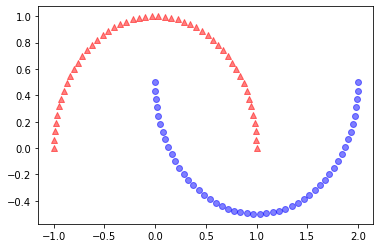

In [41]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.show()

반달 모양 데이터셋은 **선형적으로 구분되지 않는다**.<br>

목표:
- **커널 PCA로** 반달 모양을 펼쳐서 **선형 분류기에 적합한 입력 데이터셋으로 만드는 것**

<br>


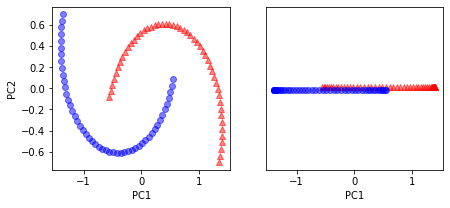

In [42]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

**기본 PCA의 주성분에 데이터셋을 투영**해도 선형 분류기가 **잘 구분할 수 없게 생겼다.**<br>

**이 변환은** 동그라미와 삼각형 사이를 판별하는 선형 분류기에 **도움이 되지 않는다.**

<br>


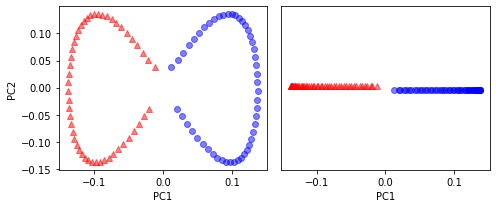

In [43]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

앞 절에서 구현한 커널 PCA 함수 **```rbf_kernel_pca```를 적용**하여 **선형적으로 구분이 잘 되**도록 만들었다.<br>

이제 두 클래스(동그라미, 삼각형)는 선형 분류기를 위한 **훈련 데이터로 적합**하다.

<br>

*여러 가지 데이터셋에 잘 맞는 **보편적인 γ 파라미터 값은 없으**므로, 이번 변환에서는 좋은 결과를 내는 **γ 값을 따로 찾아서 사용**했다.*

<br>



### **예제 2: 동심원 분리하기**

이번 예제에서는 ```make_circles```를 이용하여 동심원을 분리하여 훈련 데이터셋을 만든다.

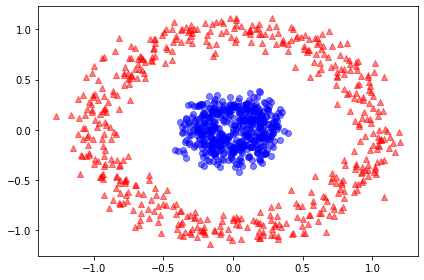

In [44]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

이 데이터셋에 기본 PCA를 사용하면 아래와 같다.

<br>


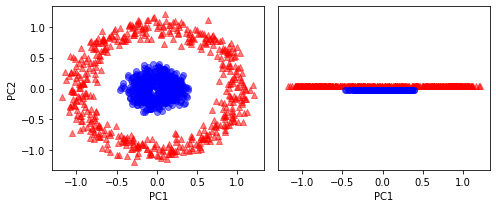

In [45]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

이 예제에서도 **기본 PCA는** 선형 분류기에 **적합한 결과를 만들지 못한다.**

<br>


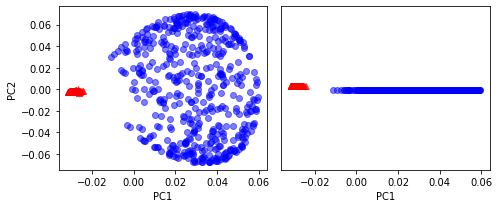

In [46]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

적절한 γ 값을 주고 **RBF 커널 PCA 구현을 사용**하면, 두 클래스를 **선형적으로 구분할 수 있는** 새로운 부분 공간으로 데이터가 투영된다.

<br>

---

<br>


## **5.3.3 새로운 데이터 포인트 투영**

앞의 예제에서는 하나의 데이터셋을 새로운 특성에 투영했지만, 실전에서는 변환해야 할 데이터셋이 하나 이상이다.<br>

이번 절에서는 훈련 데이터셋에 포함되지 않았던 **새로운 데이터 포인트를 투영하는 방법**을 배울 것이다.

<br>

커널 PCA는 **메모리 기반 방법**이라 새로운 샘플을 투영하기 위해 **매번 원본 훈련 데이터셋을 재사용**해야 한다.<br>
훈련 데이터셋에 있는 **```i```번째 새로운 샘플**과 **새로운 샘플 ```x'```** 사이의 **RBF 커널(유사도)을 계산**해야 한다.

<br>


$$\phi(x')^T = \sum_{i} a^{(i)}\phi(x')^{T}\phi(x^{(i)}$$
$$= \sum_{i}a^{(i)}\kappa(x', x^{(i)})$$

<br>

커널 행렬 K의 고유 벡터 a와 고윳값 λ는 다음 식을 만족한다.
$$Ka = \lambda a$$

<br>

새로운 샘플과 훈련 데이터셋의 샘플 간 **유사도를 계산한 후** 고윳값으로 고유 벡터 a를 **정규화**해야 한다.<br>
앞에서 구현한 ```rbf_kernel_pca``` 함수를 커널 행렬의 고윳값도 반환하도록 수정하면 다음과 같다.

<br>


In [54]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF 커널 PCA 구현
  
  매개변수
  -----------
  X: {넘파이 ndarray}, shape = [n_samples, n_features]

  gamma: float
    RBF 커널 튜닝 매개변수

  n_components: int
    반환할 주성분 개수
  
  반환값
  ----------
  alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
    투영된 데이터셋
  
  lambdas: list
    고윳값
  
  """
  # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산한다.
  sq_dists = pdist(X, 'sqeuclidean')

  # 샘플 간의 거리를 정방 대칭 행렬로 변환한다.
  mat_sq_dists = squareform(sq_dists)

  # 커널 행렬을 계산한다.
  K = exp(-gamma * mat_sq_dists)

  # 커널 행렬을 중앙에 맞춘다.
  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구한다.
  # scipy.linalg.eigh 함수는 오름차순으로 반환한다.
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

  # 최상위 k개의 고유 벡터를 선택한다.(투영 결과)
  alphas = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])
  
  # 고유 벡터에 상응하는 고윳값을 선택한다.
  lambdas = [eigvals[i] for i in range(n_components)]

  return alphas, lambdas

In [55]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

새로운 반달 데이터셋을 만들고 수정된 커널 PCA 구현을 사용하여 **1차원 부분 공간에 투영**

<br>


In [56]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [57]:
x_proj = alphas[25] # 원본 투영
x_proj

array([0.0788])

In [58]:
def project_x(x_new, X, gamma, alphas, lambdas):
  pair_dist = np.array([np.sum(
      (x_new - row)**2) for row in X])
  k = np.exp(-gamma * pair_dist)
  return k.dot(alphas / lambdas)

반달 데이터셋의 **26번째 포인트**가 새로운 데이터 포인트 **x'**라고 가정하고, 이 포인트를 **새로운 부분 공간으로 투영**

<br>



In [59]:
x_reproj = project_x(x_new, X,
                     gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

**새로운 데이터 샘플 투영**

<br>


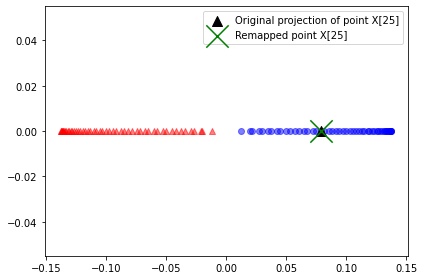

In [60]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]',
            marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]',
            marker='x', s=500)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

산점도를 통해 샘플 x'가 **첫 번째 주성분에 올바르게 매핑**되었음을 볼 수 있다.

<br>

---

<br>


## **5.3.4 사이킷런의 커널 PCA**

사이킷런의 커널 PCA는 기본 PCA 클래스 사용법과 비슷하다.

<br>


In [61]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,
                        kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

직접 구현한 커널 PCA와 동일한 결과가 나오는지 확인하기 위해 변환된 반달 모양 데이터를 그려보면 다음과 같다.

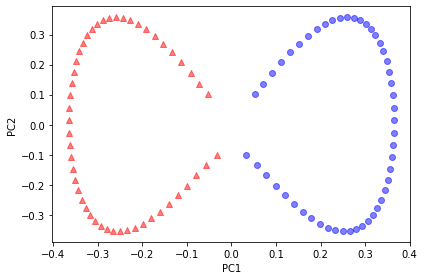

In [62]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

**사이킷런의 ```KernelPCA```의 결과는 직접 구현한 것과 같다.**

<br>

---

<br>


### **매니폴드 학습(manifold learning)**

사이킷런 라이브러리에서 구현해 놓은 비선형 차원 축소를 위한 고급 기법

<br>


In [66]:
# 변환된 2차원 데이터셋을 그래프로 그리기 위한 함수 정의

def plot_manifold(X, y):
  plt.scatter(X[y==0, 0], X[y==0, 1],
              color='red', marker='^', alpha=0.5)
  plt.scatter(X[y==1, 0], X[y==1, 1],
              color='blue', marker='o', alpha=0.5)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.tight_layout()
  plt.show()

#### **지역 선형 임베딩(Locally Linear Embedding, LLE)**
지역 선형 임베딩은 **이웃한 샘플 간의 거리를 유지하는 저차원 투영을 찾는다.**

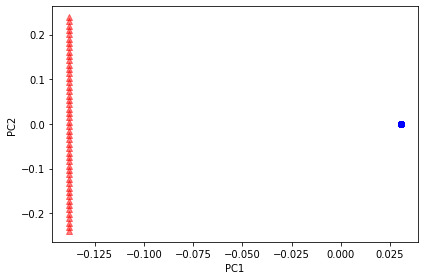

In [67]:
# 지역 선형 임베딩을 적용한 반달 데이터셋
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)
plot_manifold(X_lle, y)

반달 모양은 유지되지 않지만 두 클래스가 뚜렷하게 구분된다.

<br>


#### **t-SNE(t-distributed Stochastic Neighbor Embedding)**
t-SNE는 데이터 포인트 간의 **유사도를 결합 확률(joint probability)로 변환**하고,<br>
저차원과 고차원 확률 사이에서 **쿨백-라이블러(Kullback-Leibler) 발산을 최소화**한다.

<br>

t-SNE는 특히 **고차원 데이터셋을 시각화**하는 **성능이 뛰어나다**.

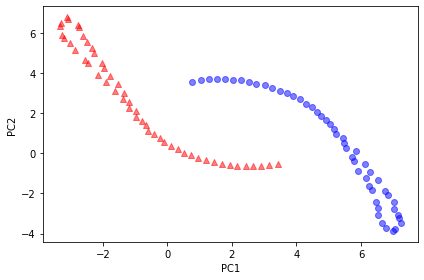

In [68]:
# t-SNE를 적용한 반달 데이터셋
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)
plot_manifold(X_tsne, y)

t-SNE는 두 클래스를 선형적으로 구분할 수 있을 정도로 잘 분리했고, 반달 모양도 어느 정도 유지하고 있다.

<br>

#### **KernelPCA, LLE, TSNE를 동심원 데이터셋에 적용**

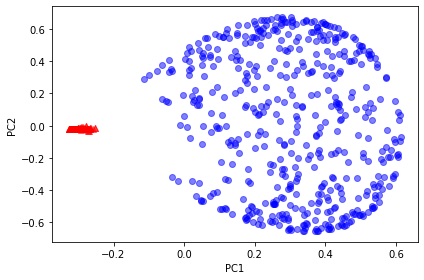

In [69]:
# KernelPCA를 적용한 동심원 데이터셋
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plot_manifold(X_skernpca, y)

직접 구현한 ```rbf_kernel_pca``` 함수와 거의 같은 결과가 나옴

<br>


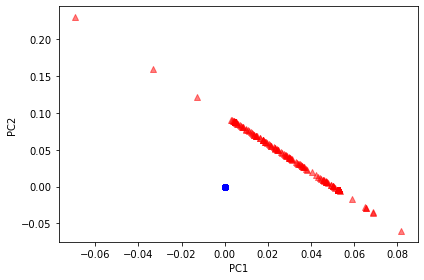

In [70]:
# 지역 선형 임베딩을 적용한 동심원 데이터셋
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=1)
X_lle = lle.fit_transform(X)
plot_manifold(X_lle, y)

두 클래스를 선형적으로 뚜렷하게 구분할 수 있음

<br>


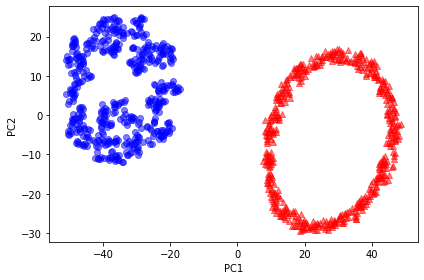

In [71]:
# t-SNE를 적용한 동심원 데이터셋
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)
plot_manifold(X_tsne, y)

두 동심원을 선형적으로 완벽하게 분리도 하고, 동심원의 모양도 거의 보존함

<br>

---